# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [114]:
import pandas as pd
import seaborn as sns
import  plotly.express as px
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load the Data

In [34]:
df = pd.read_csv("C:/Users/SaadL/OneDrive/المستندات/Tuq_Data/Traffic_Accidents.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [35]:
df.head()

Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                3.0                   1                   1.0   
1             1                3.0                   2                   1.0   
2            62                3.0                   2                   1.0   
3             4                3.0                   1                   2.0   
4            21                3.0                   2                   2.0   

         Date  Day_of_Week  ...  2nd_Road_Class 2nd_Road_Number  \
0  27/11/2009            6  ...              -1               0   
1  10/10/2010            1  ...               6               0   
2  14/09/2005            4  ...               3            4055   
3  18/08/2007            7  ...               6               0   
4  06/08/2013            3  ...              -1               0   

   Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities  \
0              None within 50 metres    No physical crossing within 50 meters   
1              None within 50 metres    No physical crossing within 50 meters   
2              None within 50 metres    No physical crossing within 50 meters   
3              None within 50 metres    No physical crossing within 50 meters   
4              None within 50 metres    No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0            Darkeness: No street lighting     Raining with high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2           Daylight: Street light present     Fine without high winds   
3           Daylight: Street light present  Raining without high winds   
4           Daylight: Street light present     Fine without high winds   

     Road_Surface_Conditions  Urban_or_Rural_Area  \
0  Flood (Over 3cm of water)                  2.0   
1                        Dry                  1.0   
2                        Dry                  1.0   
3                   Wet/Damp                  1.0   
4                        Dry                  1.0   

  Did_Police_Officer_Attend_Scene_of_Accident  Year  
0                                         Yes  2009  
1                                         Yes  2010  
2                                         Yes  2005  
3                                         Yes  2007  
4                                         Yes  2013  

[5 rows x 26 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [37]:
df.shape

(52000, 26)

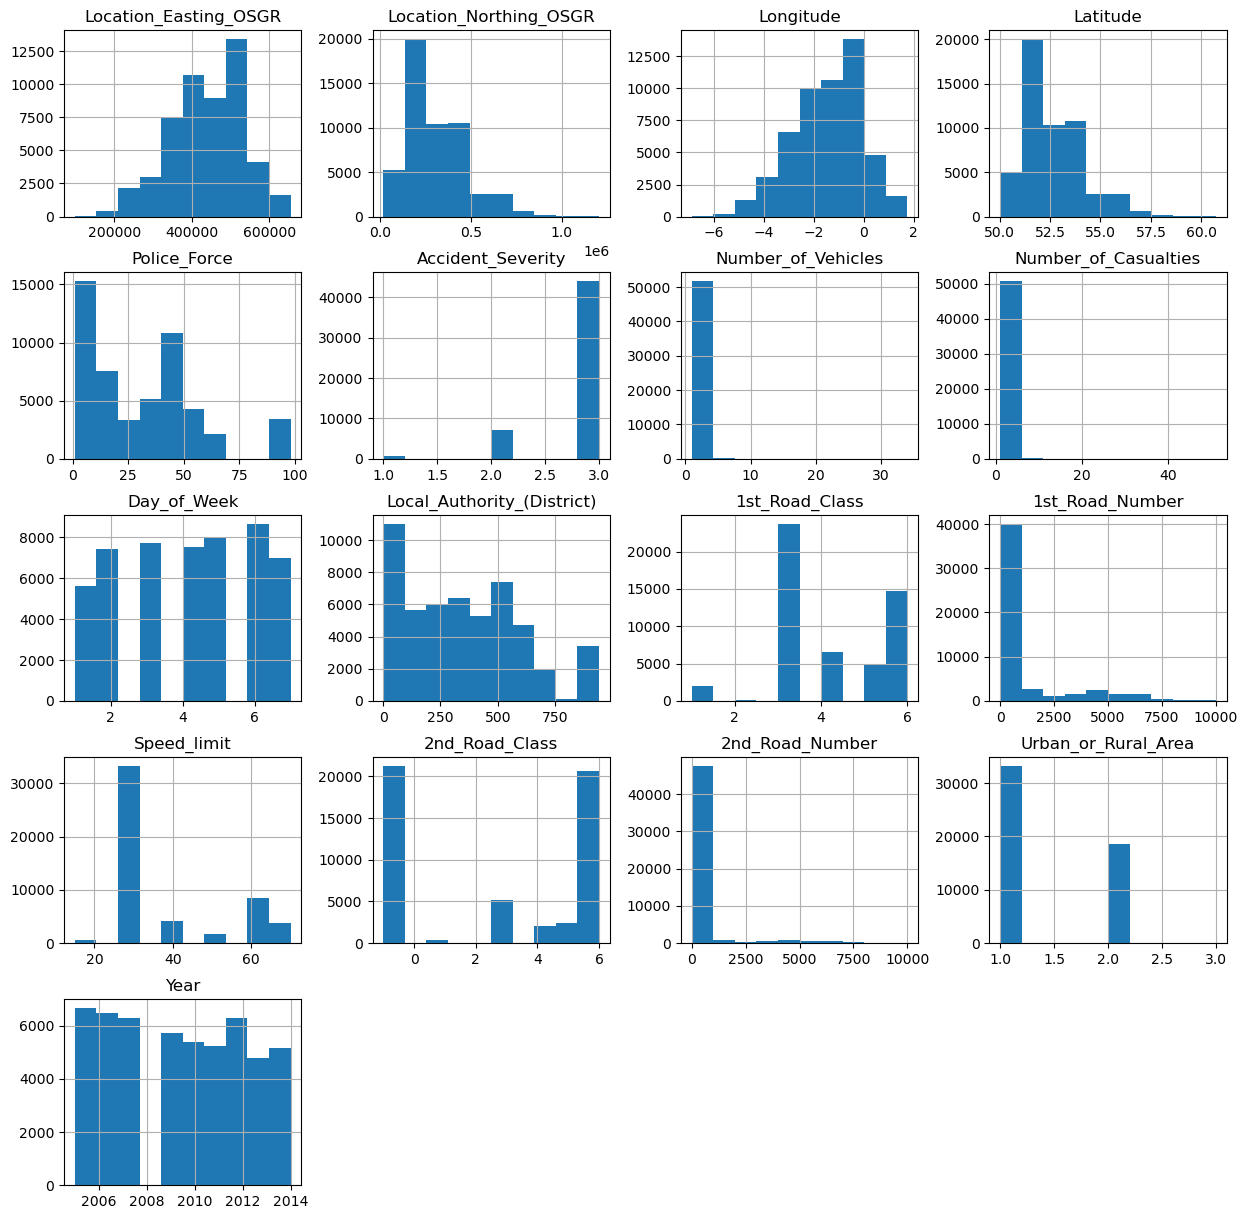

In [38]:
df.hist(figsize=(15,15));

In [39]:
df.describe()

Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           52000.000000            5.200000e+04  52000.000000   
mean           440284.256846            2.998617e+05     -1.427193   
std             95109.751221            1.613624e+05      1.398249   
min             98480.000000            1.903000e+04     -6.895268   
25%            375540.000000            1.780100e+05     -2.366190   
50%            440950.000000            2.671800e+05     -1.391202   
75%            523500.000000            3.981492e+05     -0.214666   
max            654960.000000            1.203900e+06      1.753632   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  52000.000000  52000.000000       51678.000000        52000.000000   
mean      52.586684     30.401712           2.837145            1.834327   
std        1.453049     25.545581           0.402582            0.727856   
min       50.026153      1.000000           1.000000            1.000000   
25%       51.487676      7.000000           3.000000            1.000000   
50%       52.295042     30.000000           3.000000            2.000000   
75%       53.478016     46.000000           3.000000            2.000000   
max       60.714774     98.000000           3.000000           34.000000   

       Number_of_Casualties   Day_of_Week  Local_Authority_(District)  \
count          50959.000000  52000.000000                52000.000000   
mean               1.354756      4.130712                  349.542558   
std                0.855220      1.926217                  259.504721   
min                1.000000      1.000000                    1.000000   
25%                1.000000      2.000000                  112.000000   
50%                1.000000      4.000000                  323.000000   
75%                1.000000      6.000000                  530.000000   
max               51.000000      7.000000                  941.000000   

       1st_Road_Class  1st_Road_Number   Speed_limit  2nd_Road_Class  \
count    52000.000000     52000.000000  52000.000000    52000.000000   
mean         4.080519       997.078077     39.148558        2.672673   
std          1.428056      1806.405065     14.212826        3.205080   
min          1.000000         0.000000     15.000000       -1.000000   
25%          3.000000         0.000000     30.000000       -1.000000   
50%          4.000000       128.500000     30.000000        3.000000   
75%          6.000000       716.000000     50.000000        6.000000   
max          6.000000      9999.000000     70.000000        6.000000   

       2nd_Road_Number  Urban_or_Rural_Area          Year  
count     52000.000000         51912.000000  52000.000000  
mean        384.503058             1.359397   2009.401788  
std        1304.989395             0.479868      3.006997  
min          -1.000000             1.000000   2005.000000  
25%           0.000000             1.000000   2006.000000  
50%           0.000000             1.000000   2010.000000  
75%           0.000000             2.000000   2012.000000  
max        9999.000000             3.000000   2014.000000

In [40]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [41]:
df.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

0

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

<Axes: >

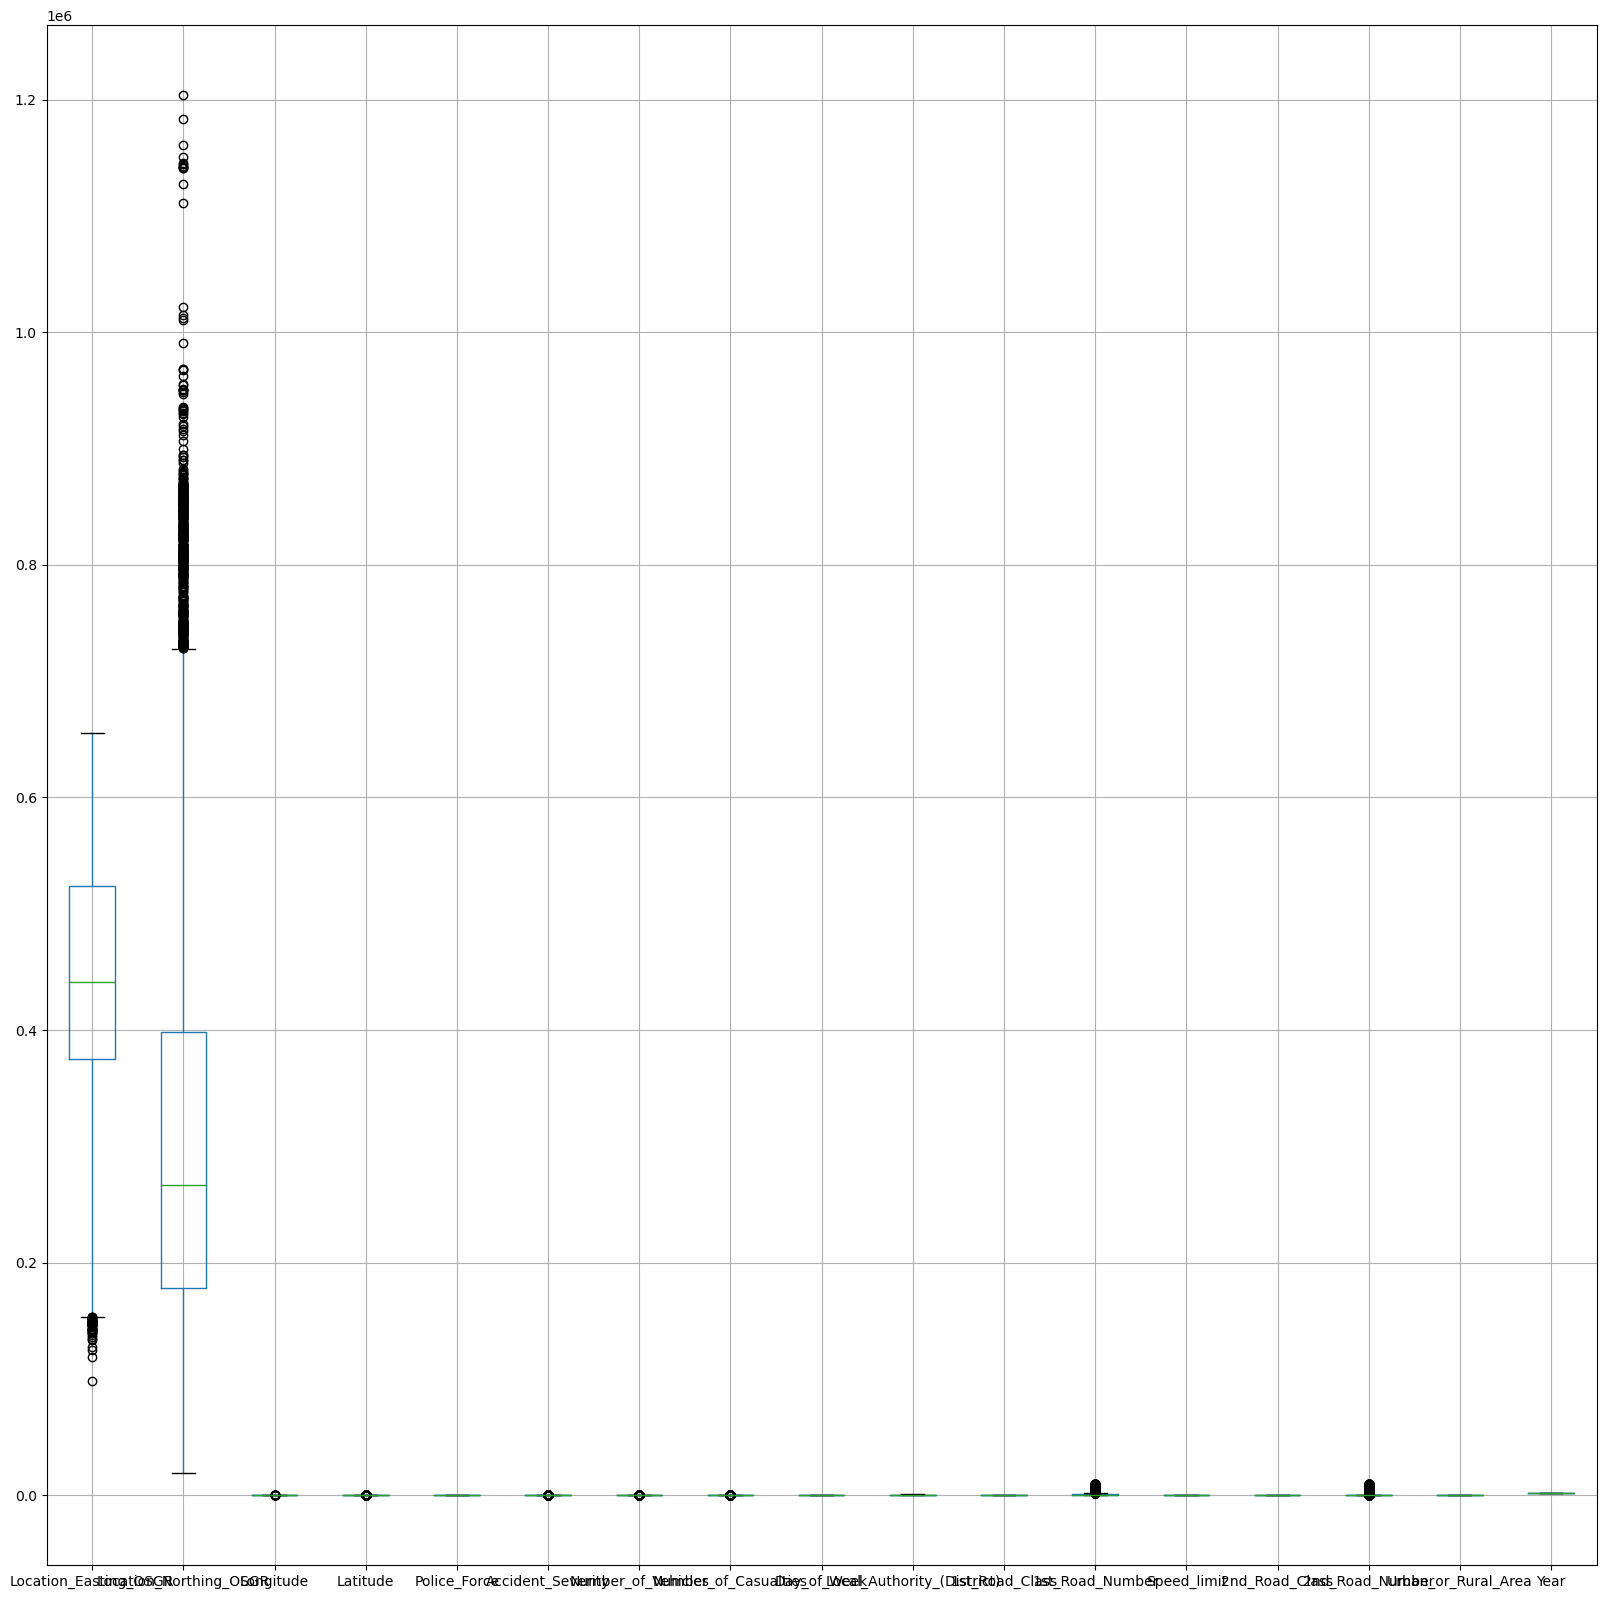

In [46]:
df.boxplot(figsize=(20,20))

In [47]:
fig = px.box(df,y='Location_Easting_OSGR')
fig.show()

In [48]:
fig = px.box(df,y='Location_Northing_OSGR')
fig.show()

In [62]:
def remove_outliers(df, Location_Easting_OSGR,Location_Northing_OSGR):
  Q1 = df['Location_Easting_OSGR'].quantile(0.25)
  Q3 = df['Location_Easting_OSGR'].quantile(0.75)
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  IQR = Q3 - Q1
  Q11 = df['Location_Northing_OSGR'].quantile(0.25)
  Q31 = df['Location_Northing_OSGR'].quantile(0.75)
  lower_limit = Q1 - 1.5 * IQR1
  upper_limit = Q3 + 1.5 * IQR1
  IQR1 = Q31 - Q11
  return df[(df['Location_Easting_OSGR','Location_Northing_OSGR'] >= lower_limit) & (df['Location_Easting_OSGR','Location_Northing_OSGR'] <= upper_limit)]

In [64]:
# i dont know how can i handel this error
 remove = remove_outliers(df,'Location_Easting_OSGR','Location_Northing_OSGR')

In [72]:
df

Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0                47                3.0                   1   
1                 1                3.0                   2   
2                62                3.0                   2   
3                 4                3.0                   1   
4                21                3.0                   2   
...             ...                ...                 ...   
51995            33                3.0                   2   
51996            44                3.0                   1   
51997            45                3.0                   3   
51998            30                3.0                   2   
51999            43                3.0                   3   

       Number_of_Casualties        Date  Day_of_Week  ...  2nd_Road_Class  \
0                       1.0  27/11/2009            6  ...              -1   
1                       1.0  10/10/2010            1  ...               6   
2                       1.0  14/09/2005            4  ...               3   
3                       2.0  18/08/2007            7  ...               6   
4                       2.0  06/08/2013            3  ...              -1   
...                     ...         ...          ...  ...             ...   
51995                   1.0  31/08/2012            6  ...               6   
51996                   1.0  08/05/2013            4  ...              -1   
51997                   1.0  01/11/2011            3  ...               6   
51998                   2.0  22/07/2011            6  ...               5   
51999                   1.0  24/05/2010            2  ...              -1   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                   0              None within 50 metres   
1                   0              None within 50 metres   
2                4055              None within 50 metres   
3                   0              None within 50 metres   
4                   0              None within 50 metres   
...               ...                                ...   
51995            6485              None within 50 metres   
51996               0              None within 50 metres   
51997               0              None within 50 metres   
51998              81              None within 50 metres   
51999               0              None within 50 metres   

           Pedestrian_Crossing-Physical_Facilities  \
0            No physical crossing within 50 meters   
1            No physical crossing within 50 meters   
2            No physical crossing within 50 meters   
3            No physical crossing within 50 meters   
4            No physical crossing within 50 meters   
...                                            ...   
51995  Pedestrian phase at traffic signal junction   
51996        No physical crossing within 50 meters   
51997        No physical crossing within 50 meters   
51998        No physical crossing within 50 meters   
51999        No physical crossing within 50 meters   

                              

In [73]:
df.drop(columns=('Date'),inplace=True)

In [91]:
Scale = StandardScaler()
df['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude'] = Scale.fit_transform(df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude']]).__array__


In [93]:
df['2nd_Road_Class','2nd_Road_Number'] = Scale.fit_transform(df[['2nd_Road_Class','2nd_Road_Number']]).__array__

In [98]:
from sklearn.preprocessing import OneHotEncoder
OE = OneHotEncoder()
df['Pedestrian_Crossing-Human_Control',	'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']=OE.fit_transform(df[['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']]).shape[0]

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
df = PCA.fit_transform()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [105]:
fig = px.scatter(df, x="Longitude", y="Latitude", color="Accident_Severity",)
fig.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [107]:
dataset=df.iloc[:,[0,1]].values
dataset
WCSS=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(dataset)
  WCSS.append(kmeans.inertia_)
WCSS

c:\Users\SaadL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\SaadL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[1754020106726521.8,
 781509978405221.8,
 506717489987953.06,
 313480744353044.7,
 282766350925296.7,
 213172598326240.0,
 185834644660735.1,
 160079920781153.8,
 138693544499251.95]

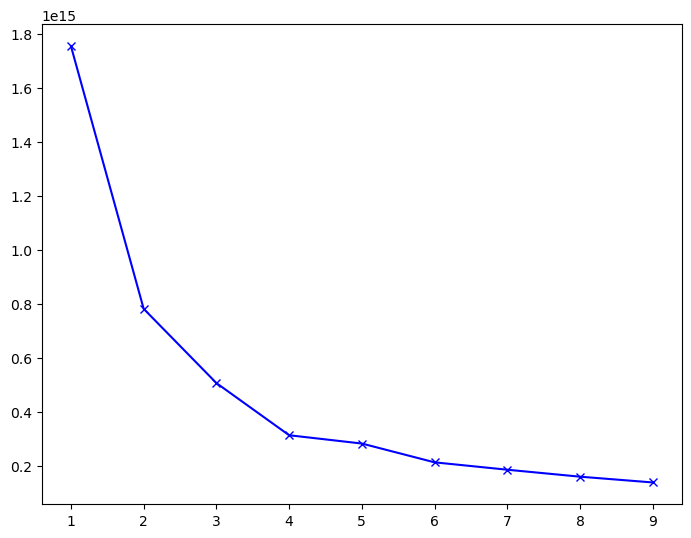

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(1,10),WCSS,'bx-')
plt.show()

In [111]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(dataset)
y_kmeans

array([2, 2, 3, ..., 2, 0, 2])

In [112]:
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2*(2*np.random.random((df.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662, -1.11581855,
          0.74488834, -1.33144319, -0.43023013,  0.47220939, -0.35227962,
         -1.99014048,  1.53612873,  1.53979015, -0.79836124,  0.35832746,
          1.91370766,  1.38037529, -1.73969824, -0.82102214, -0.84826224,
          1.28986536,  0.50473215, -1.55808914, -1.99788476,  1.76866493,
         -1.43399697, -0.3136139 , -0.61404224]),
  'points': []},
 1: {'center': array([ 1.47914034, -0.28559275,  1.31500594,  0.87140735, -1.52309322,
          0.38553669, -1.48097481, -1.68986363,  1.32482102, -0.14245754,
         -1.35195008,  0.19190117,  0.35394329,  1.09445268,  0.62338183,
          0.23082704, -1.28701093, -1.03766588,  0.02421853, -0.4130172 ,
         -0.06777926,  1.82295936,  1.60640877,  0.02303729,  1.28280594,
          1.3108637 , -1.07266661, -1.68377805]),
  'points': []},
 2: {'center': array([-0.13694829,  1.51590323, -1.40998777, -1.07499478,  1.67178322,
         -1.4

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix()

## Plot the data points with their predicted cluster center

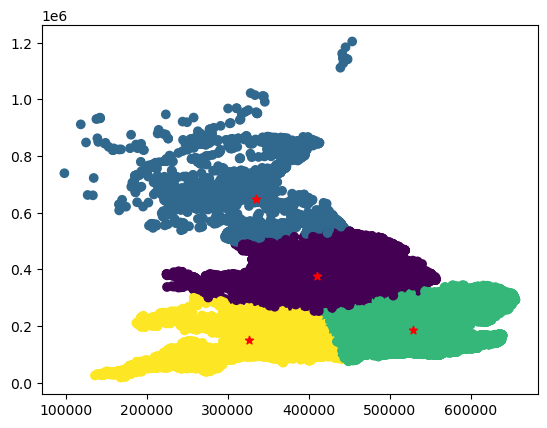

In [113]:
plt.scatter(dataset[:,0], dataset[:,1], c=y_kmeans,)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker= '*' , color='red')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?